# Analysys of Halarity at the FOMC

my jank fuckin analysys. 
shoutout chatgpt

Block uses:
Probably do not run blocks 1-4, since I have included the CSV for the data.

0. libraries
1. Extract the links for each transcrpt
2. Remove transcribed confcalls to make the data consistent
3. Scrape the Fed website for the PDFs [takes like 3 minutes w my good wireless connection] [like 830 MB total]
4. Extract data from the PDFs [like 15 minutes]
5. Fix the dates
---
6. Analysys (just graphin shit)


In [11]:
import requests
from bs4 import BeautifulSoup
import re
import os
import pandas as pd
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt

In [1]:


# Function to get all transcript links for a given year
def get_transcript_links(year):
    base_url = f"https://www.federalreserve.gov/monetarypolicy/fomchistorical{year}.htm"
    try:
        response = requests.get(base_url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        links = soup.find_all('a', text=re.compile(r'Transcript.*PDF'))
        return [link['href'] for link in links if 'href' in link.attrs]
    except requests.exceptions.RequestException as e:
        print(f"Error accessing {base_url}: {e}")
        return []

# Main loop to iterate over the years and collect links
start_year = 1976
end_year = 2018  # transcripts only available on this website to 2018
base_url = "https://www.federalreserve.gov"

all_links = {}
for year in range(start_year, end_year + 1):
    print(f"Fetching transcript links for {year}...")
    links = get_transcript_links(year)
    full_links = [base_url + link if link.startswith('/') else link for link in links]
    all_links[year] = full_links

# Save links for review
with open('/home/robbies/Desktop/FOMC transcripts/FOMC_transcripts_links.txt', 'w') as f:
    for year, links in all_links.items():
        f.write(f"Year {year}:\n")
        for link in links:
            f.write(f"{link}\n")
        f.write("\n")

print("Links saved to /home/robbies/Desktop/FOMC transcripts/FOMC_transcripts_links.txt.")


Fetching transcript links for 1976...


/tmp/ipykernel_39759/1280593154.py:12: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  links = soup.find_all('a', text=re.compile(r'Transcript.*PDF'))


Fetching transcript links for 1977...
Fetching transcript links for 1978...
Fetching transcript links for 1979...
Fetching transcript links for 1980...
Fetching transcript links for 1981...
Fetching transcript links for 1982...
Fetching transcript links for 1983...
Fetching transcript links for 1984...
Fetching transcript links for 1985...
Fetching transcript links for 1986...
Fetching transcript links for 1987...
Fetching transcript links for 1988...
Fetching transcript links for 1989...
Fetching transcript links for 1990...
Fetching transcript links for 1991...
Fetching transcript links for 1992...
Fetching transcript links for 1993...
Fetching transcript links for 1994...
Fetching transcript links for 1995...
Fetching transcript links for 1996...
Fetching transcript links for 1997...
Fetching transcript links for 1998...
Fetching transcript links for 1999...
Fetching transcript links for 2000...
Fetching transcript links for 2001...
Fetching transcript links for 2002...
Fetching tra

In [4]:
# Path to the file containing the scraped links
input_file = '/home/robbies/Desktop/FOMC transcripts/FOMC_transcripts_links.txt'
output_file = '/home/robbies/Desktop/FOMC transcripts/FOMC_transcripts_links_cleaned.txt'

# Read the file and filter out unwanted links
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        if "confcall.pdf" not in line and "ConfCall.pdf" not in line:  # Exclude unwanted links
            outfile.write(line)

print(f"Cleaned links saved to {output_file}.")


Cleaned links saved to /home/robbies/Desktop/FOMC transcripts/FOMC_transcripts_links_cleaned.txt.


In [6]:


# Set output folder
output_folder = "/home/robbies/Desktop/FOMC transcripts/"
os.makedirs(output_folder, exist_ok=True)

# Load links from file
with open('/home/robbies/Desktop/FOMC transcripts/FOMC_transcripts_links_cleaned.txt', 'r') as f:
    links = [line.strip() for line in f if line.startswith('http')]

# Function to download a PDF file
def download_pdf(pdf_url):
    try:
        filename = os.path.join(output_folder, pdf_url.split('/')[-1])
        if not os.path.exists(filename):  # Avoid redownloading files
            response = requests.get(pdf_url)
            response.raise_for_status()
            with open(filename, 'wb') as f:
                f.write(response.content)
            print(f"Downloaded: {filename}")
        else:
            print(f"Already exists: {filename}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading {pdf_url}: {e}")

# Download each link
for pdf_url in links:
    download_pdf(pdf_url)

print(f"All PDFs downloaded to {output_folder}.")


Downloaded: /home/robbies/Desktop/FOMC transcripts/FOMC19760329meeting.pdf
Downloaded: /home/robbies/Desktop/FOMC transcripts/FOMC19760420meeting.pdf
Downloaded: /home/robbies/Desktop/FOMC transcripts/FOMC19760518meeting.pdf
Downloaded: /home/robbies/Desktop/FOMC transcripts/FOMC19760622meeting.pdf
Downloaded: /home/robbies/Desktop/FOMC transcripts/FOMC19760720meeting.pdf
Downloaded: /home/robbies/Desktop/FOMC transcripts/FOMC19760817meeting.pdf
Downloaded: /home/robbies/Desktop/FOMC transcripts/FOMC19760921meeting.pdf
Downloaded: /home/robbies/Desktop/FOMC transcripts/FOMC19761019meeting.pdf
Downloaded: /home/robbies/Desktop/FOMC transcripts/FOMC19761116meeting.pdf
Downloaded: /home/robbies/Desktop/FOMC transcripts/FOMC19761221meeting.pdf
Downloaded: /home/robbies/Desktop/FOMC transcripts/FOMC19770118meeting.pdf
Downloaded: /home/robbies/Desktop/FOMC transcripts/FOMC19770215meeting.pdf
Downloaded: /home/robbies/Desktop/FOMC transcripts/FOMC19770315meeting.pdf
Downloaded: /home/robbies

In [9]:


# Directory containing the PDF files
pdf_directory = '/home/robbies/Desktop/FOMC transcripts/'

# Initialize an empty DataFrame
results = []

# Process each PDF in the directory
for pdf_file in os.listdir(pdf_directory):
    if pdf_file.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, pdf_file)
        try:
            # Open the PDF file
            reader = PdfReader(pdf_path)
            full_text = ""
            for page in reader.pages:
                full_text += page.extract_text()
            
            # Collect the data
            laughter_occurrences = full_text.lower().count('[laughter]')
            char_count = len(full_text)
            
            # Extract 200 chars before and 50 chars after each occurrence
            snippets = []
            index = 0
            while True:
                index = full_text.lower().find('[laughter]', index)
                if index == -1:
                    break
                start = max(0, index - 200)
                end = min(len(full_text), index + len('[laughter]') + 50)
                snippet = full_text[start:index] + '[laughter]' + full_text[index + len('[laughter]'):end]
                snippets.append(snippet.strip())
                index += len('[laughter]')
            
            # Date is inferred from the PDF filename
            date = pdf_file.split('FOMC')[-1].split('meeting')[0].strip()
            
            # Append the results to the list
            results.append({
                "date": date,
                "laughter_count": laughter_occurrences,
                "char_count": char_count,
                "snippets": snippets
            })
        except Exception as e:
            print(f"Error processing {pdf_file}: {e}")

# Convert results to a DataFrame
df = pd.DataFrame(results)

# Save the DataFrame to a CSV for future reference
output_csv = os.path.join(pdf_directory, "fomc_laughter_analysis.csv")
df.to_csv(output_csv, index=False)

print(f"Analysis complete. Results saved to {output_csv}.")


Analysis complete. Results saved to /home/robbies/Desktop/FOMC transcripts/fomc_laughter_analysis.csv.


In [10]:
# Clean the dates
# Read in the CSV
df = pd.read_csv('/home/robbies/Desktop/FOMC transcripts/fomc_laughter_analysis.csv')

# Ensure the 'date' column is in ISO format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

# Overwrite the CSV with the updated date format
df.to_csv('/home/robbies/Desktop/FOMC transcripts/fomc_laughter_analysis.csv', index=False)

print(f"File overwritten with ISO-formatted dates: /home/robbies/Desktop/FOMC transcripts/fomc_laughter_analysis.csv")

File overwritten with ISO-formatted dates: /home/robbies/Desktop/FOMC transcripts/fomc_laughter_analysis.csv


# Analysys

### Variables:

| Variable Name | Description |
|----|----|
| date | ISO formatted date of meeting transcript |
| laughter_count | # of times the string '[laughter]' (not case sensitive) appears in the transcript |
| char_count | # of charecters in the document |
| snippets | A list of snippets, 200 chars before and 50 chars after, each laugh. |


### Commentary:

Simply made a itme series of absoulute laughs, and laughs/charecters, trying to controll for the length of the meeting (longer meetings == more opportunities for laughter)
It looks like there isn't really much sillyness before 1994. This is relevant because there was a recording change, so earlier then that I guess there are some issues. 

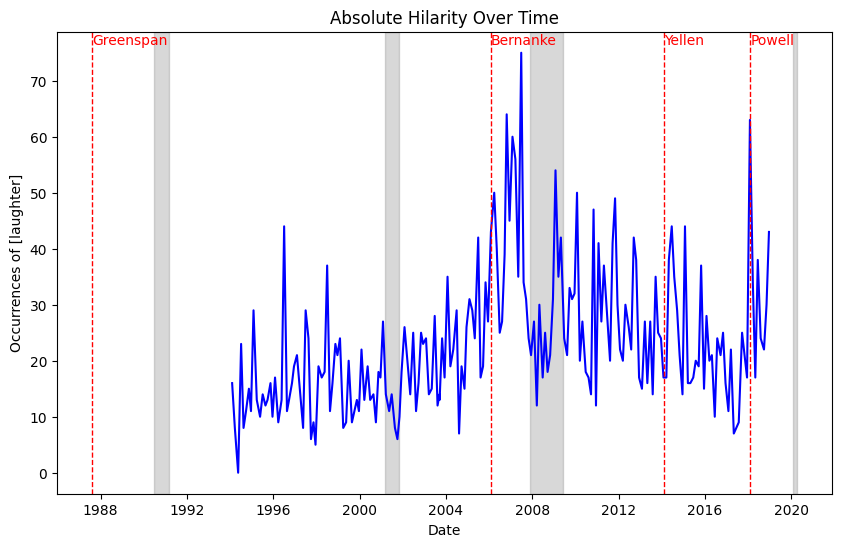

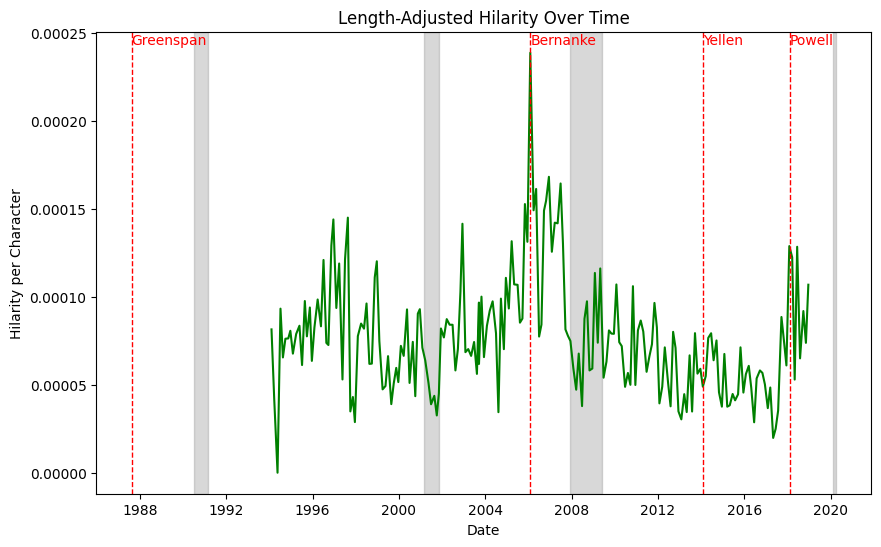

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Recession periods (start and end dates)
recessions = [
    ('1990-07-01', '1991-03-01'),
    ('2001-03-01', '2001-11-01'),
    ('2007-12-01', '2009-06-01'),
    ('2020-02-01', '2020-04-01')
]

# Changes in Federal Reserve Chair (date of change)
chair_changes = [
    '1987-08-11',  # Greenspan starts
    '2006-02-01',  # Bernanke starts
    '2014-02-03',  # Yellen starts
    '2018-02-05'   # Powell starts
]

# Filter out data before 1994
df = df[pd.to_datetime(df['date']) >= pd.Timestamp('1994-01-01')]

# Calculate length-adjusted hilarity
df['length_adjusted_hilarity'] = df['laughter_count'] / df['char_count']

# Sort by date
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

# Plot Absolute Hilarity
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['laughter_count'], label='Absolute Hilarity', color='blue')

# Add recession bars
for start, end in recessions:
    plt.axvspan(pd.Timestamp(start), pd.Timestamp(end), color='grey', alpha=0.3)

# Add chair change lines and right-aligned labels
for i, date in enumerate(chair_changes):
    plt.axvline(pd.Timestamp(date), color='red', linestyle='--', linewidth=1)
    # Add labels to the right of the line
    plt.text(pd.Timestamp(date), max(df['laughter_count']) * 1.02, 
             ['Greenspan', 'Bernanke', 'Yellen', 'Powell'][i], 
             rotation=0, horizontalalignment='left', fontsize=10, color='red')



plt.title('Absolute Hilarity Over Time')
plt.xlabel('Date')
plt.ylabel('Occurrences of [laughter]')
plt.show()

# Plot Length-Adjusted Hilarity
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['length_adjusted_hilarity'], label='Length-Adjusted Hilarity', color='green')

# Add recession bars
for start, end in recessions:
    plt.axvspan(pd.Timestamp(start), pd.Timestamp(end), color='grey', alpha=0.3)

# Add chair change lines and right-aligned labels
for i, date in enumerate(chair_changes):
    plt.axvline(pd.Timestamp(date), color='red', linestyle='--', linewidth=1)
    # Add labels to the right of the line
    plt.text(pd.Timestamp(date), max(df['length_adjusted_hilarity']) * 1.02, 
             ['Greenspan', 'Bernanke', 'Yellen', 'Powell'][i], 
             rotation=0, horizontalalignment='left', fontsize=10, color='red')



plt.title('Length-Adjusted Hilarity Over Time')
plt.xlabel('Date')
plt.ylabel('Hilarity per Character')
plt.show()
